In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('Fin_Uci_thyroid1.csv')
feat = data.iloc[:,0:-1]
tar = data.iloc[:,-1]

In [2]:
feat.shape

(6928, 31)

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(feat)
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)
from knn import knn_
knn_(principalDf,tar,0.33)

2
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2163
           1       0.86      0.22      0.36        85
           2       0.29      0.05      0.09        39

    accuracy                           0.95      2287
   macro avg       0.70      0.42      0.47      2287
weighted avg       0.94      0.95      0.94      2287

3
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2163
           1       0.87      0.24      0.37        85
           2       0.26      0.13      0.17        39

    accuracy                           0.95      2287
   macro avg       0.70      0.45      0.51      2287
weighted avg       0.94      0.95      0.94      2287

4
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2163
           1       0.89      0.19      0.31        85
           2       0.14      0.03      0.04        39

    accuracy  

In [4]:
from nn import nn
history=nn(feat,tar,0.2)

Using TensorFlow backend.
Epoch 1/50
111/111 [==============================] - 0s 3ms/step - loss: 0.6625 - accuracy: 0.7789 - val_loss: 0.2426 - val_accuracy: 0.9549
Epoch 2/50
111/111 [==============================] - 0s 2ms/step - loss: 0.3425 - accuracy: 0.9384 - val_loss: 0.2029 - val_accuracy: 0.9549
Epoch 3/50
111/111 [==============================] - 0s 2ms/step - loss: 0.2874 - accuracy: 0.9432 - val_loss: 0.1819 - val_accuracy: 0.9558
Epoch 4/50
111/111 [==============================] - 0s 2ms/step - loss: 0.2599 - accuracy: 0.9441 - val_loss: 0.1677 - val_accuracy: 0.9585
Epoch 5/50
111/111 [==============================] - 0s 2ms/step - loss: 0.2392 - accuracy: 0.9468 - val_loss: 0.1546 - val_accuracy: 0.9585
Epoch 6/50
111/111 [==============================] - 0s 2ms/step - loss: 0.2234 - accuracy: 0.9470 - val_loss: 0.1474 - val_accuracy: 0.9585
Epoch 7/50
111/111 [==============================] - 0s 2ms/step - loss: 0.1965 - accuracy: 0.9492 - val_loss: 0.1371 - v

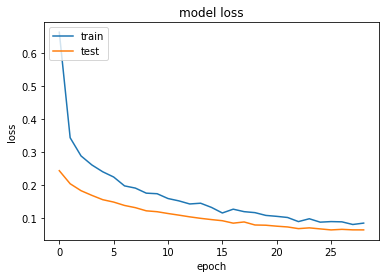

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [6]:
from naivebayes import naive_bayes
naive_bayes(feat,tar,0.2)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1316
           1       1.00      0.02      0.05        41
           2       0.29      0.07      0.11        29

    accuracy                           0.95      1386
   macro avg       0.75      0.36      0.38      1386
weighted avg       0.94      0.95      0.93      1386



In [7]:
from xgboost_ import xgboost_
xgboost_(feat,tar,0.2)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1316
           1       1.00      1.00      1.00        41
           2       0.46      0.45      0.46        29

    accuracy                           0.98      1386
   macro avg       0.82      0.81      0.81      1386
weighted avg       0.98      0.98      0.98      1386



In [8]:
from ensemble_ import ensemble_
ensemble_(feat,tar,0.2)

{'n_neighbors': 5}
{'n_estimators': 400}
knn: 0.9473304473304474
rf: 0.9783549783549783
log_reg: 0.948051948051948
ensemble voting score:  0.948051948051948
ensemble bagging score:  0.9783549783549783
ensemble stacking score:  0.9783549783549783
